# ----- Tide Gauge (TG) data  analysis ----- 

## Load "Pyferret" to Jupyter-notebook.

In [1]:
%load_ext ferretmagic

## Load Tide gauge data.

In [2]:
%%ferret
use Data/TG/Antarctica_d127.nc
use Data/TG/Gan_d109.nc
use Data/TG/Kanton_d013.nc
use Data/TG/Padang_d107.nc
use Data/TG/Gan_d109_hourly.nc

           *** NOTE: Dataset has FeatureType attribute: Timeseries
           *** NOTE: But is not initialized as a DSG File: Row Size variable w/ sample_dimension attribute not found.
           *** NOTE: Initializing the file as a non-DSG dataset
           *** NOTE: Dataset has FeatureType attribute: Timeseries
           *** NOTE: But is not initialized as a DSG File: Row Size variable w/ sample_dimension attribute not found.
           *** NOTE: Initializing the file as a non-DSG dataset
           *** NOTE: Dataset has FeatureType attribute: Timeseries
           *** NOTE: But is not initialized as a DSG File: Row Size variable w/ sample_dimension attribute not found.
           *** NOTE: Initializing the file as a non-DSG dataset
           *** NOTE: Dataset has FeatureType attribute: Timeseries
           *** NOTE: But is not initialized as a DSG File: Row Size variable w/ sample_dimension attribute not found.
           *** NOTE: Initializing the file as a non-DSG dataset
    

## ! -----  Plot the TG loctions  ----- !

! Enter_GO basemap x=20:200 y=-75:40
! Exit_GO
! Enter_GO land 7
! Exit_GO


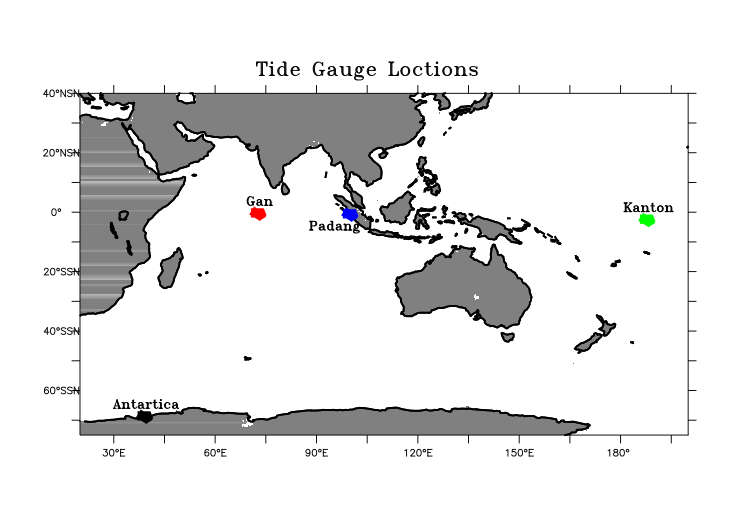

In [3]:
%%ferret
set win/asp=.7

go basemap x=20:200 y=-75:40 ; go land 7  ! plot map

plot/vs/over/nolab/thick=10/sym=88/color=black lon[d=1],lat[d=1]
plot/vs/over/nolab/thick=10/sym=88/color=red   lon[d=2],lat[d=2]
plot/vs/over/nolab/thick=10/sym=88/color=green lon[d=3],lat[d=3]
plot/vs/over/nolab/thick=10/sym=88/color=blue  lon[d=4],lat[d=4]

label `lon[d=1]`,`lat[d=1]+3`,0,0,0.13 @TRAntartica
label `lon[d=2]`,`lat[d=2]+3`,0,0,0.13 @TRGan
label `lon[d=3]`,`lat[d=3]+3`,0,0,0.13 @TRKanton
label `lon[d=4]-5`,`lat[d=4]-5`,0,0,0.13 @TRPadang
label 105,46,0,0,0.2 @TRTide Gauge Loctions

##  ---          Gan tide gauge  ---
##  ----  Compare Hourly and Daily TG data ---- !


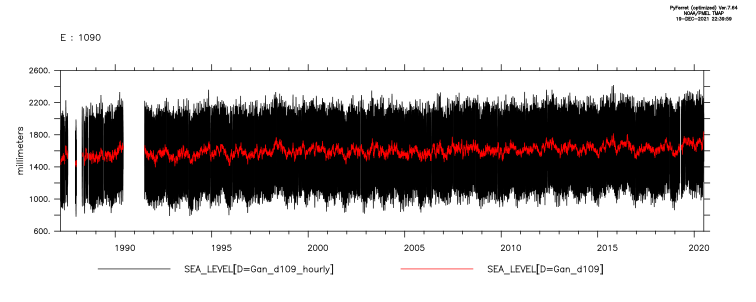

In [4]:
%%ferret
set win/asp=.4
plot sea_level[d=5],sea_level[d=2]

##  ----  Restrict the time for a Year ---- !


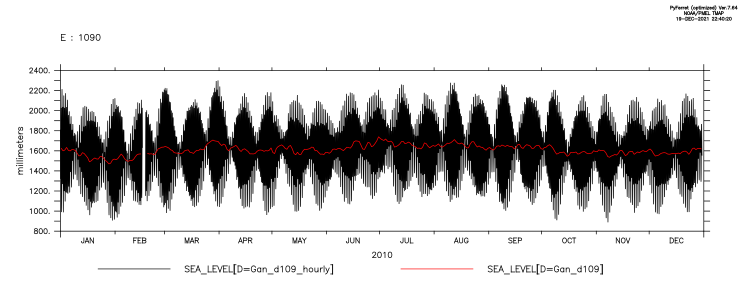

In [5]:
%%ferret
set win/asp=.4
plot/t=01-jan-2010:31-dec-2010 sea_level[d=5],sea_level[d=2] 

##  ----  Restrict the time for a month ---- !


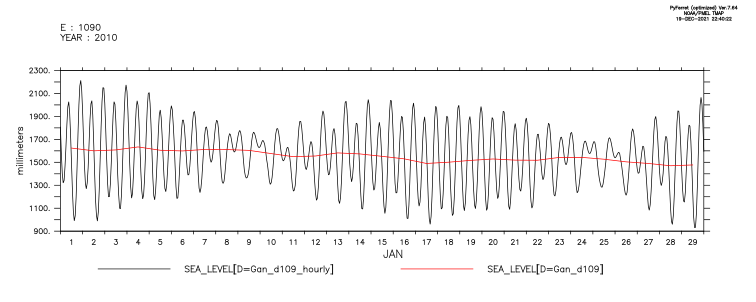

In [6]:
%%ferret
set win/asp=.4
plot/t=01-jan-2010:30-Jan-2010 sea_level[d=5],sea_level[d=2]

## ! ---- Calculating amplitude Spectum  ------- !

### to check how hourly and daily data are different 

In [7]:
%%ferret
define axis/t="04-MAR-1987 10:00":"30-JUN-2020 22:00":1/units=hours tax
define grid/t=tax grd
let Gan_hr = sea_level[d=5,g=grd]

let Ga_Hr_ffta = ffta(Gan_hr[l=10:292100@fln:3]) ; let G_Hr = 1/(t[gt=Ga_Hr_ffta]*24)
let Ga_dy_ffta = ffta(sea_level[d=2,l=@fln:3]) ; let G_dy = 1/t[gt=Ga_dy_ffta]


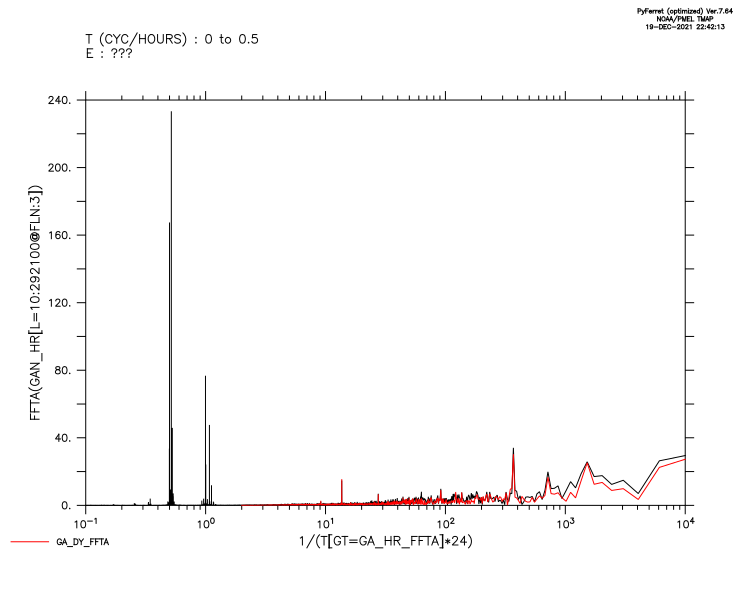

In [8]:
%%ferret
set win/asp=0.8

plot/vs/line/color=black/hlimit=0.08:6000/hlog  G_hr,Ga_hr_ffta
plot/vs/line/color=red/hlog/over                G_dy,Ga_dy_ffta

<img src="Images/Han_paper_title.png" width="600" height="400">
<img src="Images/Han_30_90_Gan.png" width="400" height="400">  


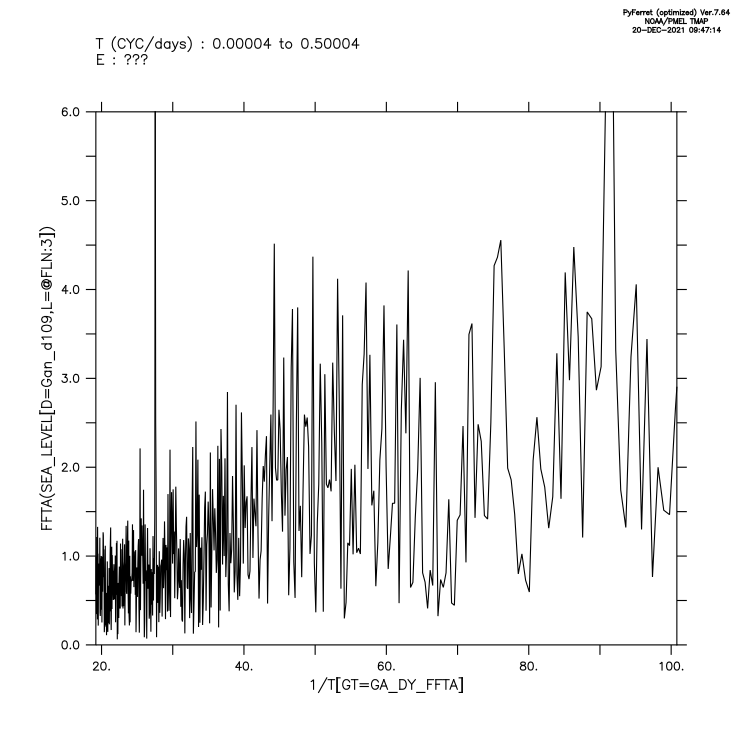

In [38]:
%%ferret
set win/asp=1.0
plot/vs/line/color=black/hlimit=20:100/vlimit=0:6/thick=1 G_dy,Ga_dy_ffta


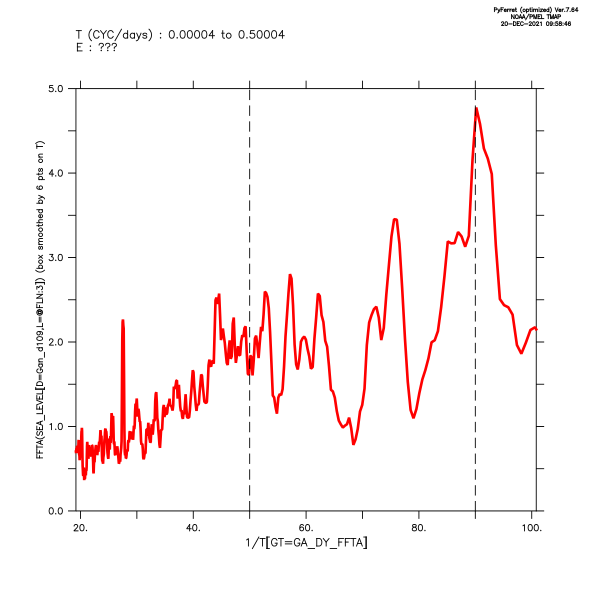

In [48]:
%%ferret -s 600,800
set win/asp=1.0
plot/vs/line/color=red/hlimit=20:100/vlimit=0:5/thick=3  G_dy,Ga_dy_ffta[l=@sbx:6]
plot/vs/line/color=black/over/dash/nolab {50,50},{0,5}
plot/vs/line/color=black/over/dash/nolab {90,90},{0,5}
ppl xlab

<img src="Images/Han_30_90_Gan.png" width="600" height="600">  

## ! -----  Plot the evolution of daily sea level from all 4 TG   ----- !


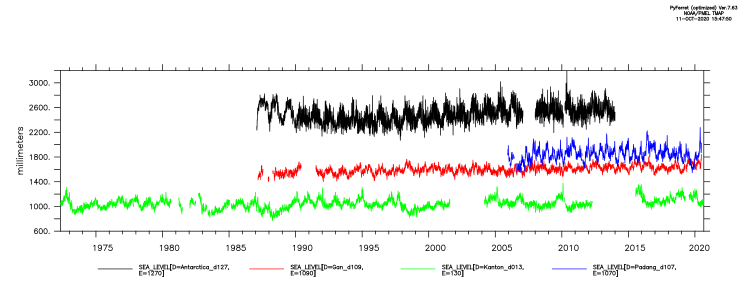

In [25]:
%%ferret
set win/asp=.4
plot sea_level[d=1],sea_level[d=2],sea_level[d=3],sea_level[d=4]

In [19]:
%%ferret
set win/asp=.7
plot/vs/line/color=black/hlimit=10:150/vlimit=0:10   G_an,Ga_ffta[l=@sbx:5]
plot/vs/line/color=red/hlimit=10:150/vlimit=0:10/over/thick=3 G_an,Ga_ffta[l=@sbx:11]


yes? plot/vs/line/color=black/hlimit=10:150/vlimit=0:10 G_an,Ga_ffta[l=@sbx:5]
**ERROR: variable unknown or not in data set: G_AN